In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import scipy.optimize as sco
from scipy import stats
%matplotlib inline
path= ("C:/Users/yacine/Desktop/thesis/pred/gru")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [2]:
all_files = glob.glob(os.path.join(path, "df_*.csv"))

In [3]:
all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    all_df.append(df)


In [4]:
merged_df = pd.concat(all_df, sort=False, axis=1)
merged_df

,Unnamed: 0,AAPL_close_gru_pred,Unnamed: 0,AMGN_close_gru_pred,Unnamed: 0,AXP_close_gru_pred,Unnamed: 0,BA_close_gru_pred,Unnamed: 0,CAT_close_gru_pred,...,Unnamed: 0,UNH_close_gru_pred,Unnamed: 0,V_close_gru_pred,Unnamed: 0,VZ_close_gru_pred,Unnamed: 0,WBA_close_gru_pred,Unnamed: 0,WMT_close_gru_pred
0,0,28.795069,0,121.301490,0,72.995550,0,111.806130,0,65.816610,...,0,92.464380,0.0,71.665880,0,25.289007,0,53.531060,0,40.145220
1,1,28.950077,1,121.160710,1,72.623380,1,111.940580,1,63.723820,...,1,92.394325,1.0,70.988410,1,24.953037,1,53.310226,1,39.887050
2,2,29.040293,2,122.349030,2,73.126930,2,112.497350,2,66.987076,...,2,92.859150,2.0,70.005400,2,25.518229,2,53.617226,2,39.700764
3,3,29.025213,3,122.979675,3,73.263084,3,111.834580,3,65.817400,...,3,93.148470,3.0,70.160350,3,25.240845,3,53.629925,3,39.342804
4,4,28.914160,4,123.381190,4,74.040054,4,112.395065,4,67.328070,...,4,93.130646,4.0,69.961624,4,25.659967,4,54.061410,4,40.185210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,891,30.826120,891,133.937260,891,90.960075,891,119.949680,891,106.726610,...,891,102.417150,NaN,NaN,891,29.859840,891,48.310726,891,47.375230
892,892,30.867998,892,134.074070,892,90.861725,892,120.210860,892,106.021545,...,892,102.503130,NaN,NaN,892,30.036070,892,48.525295,892,47.139652
893,893,30.867332,893,133.870900,893,90.547930,893,120.246440,893,106.348480,...,893,102.458330,NaN,NaN,893,29.903536,893,48.204160,893,47.049385
894,894,30.914097,894,133.988740,894,91.010666,894,120.746260,894,106.485410,...,894,102.521040,NaN,NaN,894,30.171406,894,48.048325,894,47.166973


In [5]:
stock_pred=merged_df.drop(['Unnamed: 0'], axis = 1) 
stock_pred

,AAPL_close_gru_pred,AMGN_close_gru_pred,AXP_close_gru_pred,BA_close_gru_pred,CAT_close_gru_pred,CRM_close_gru_pred,CSCO_close_gru_pred,CVX_close_gru_pred,DIS_close_gru_pred,GS_close_gru_pred,...,MRK_close_gru_pred,MSFT_close_gru_pred,NKE_close_gru_pred,PG_close_gru_pred,TRV_close_gru_pred,UNH_close_gru_pred,V_close_gru_pred,VZ_close_gru_pred,WBA_close_gru_pred,WMT_close_gru_pred
0,28.795069,121.301490,72.995550,111.806130,65.816610,60.837803,19.255224,74.809944,83.559840,135.38780,...,35.197582,27.058094,42.705887,55.401608,83.269130,92.464380,71.665880,25.289007,53.531060,40.145220
1,28.950077,121.160710,72.623380,111.940580,63.723820,61.736618,19.164831,74.937860,83.659120,134.61750,...,34.135060,27.066576,42.820450,54.836174,83.227470,92.394325,70.988410,24.953037,53.310226,39.887050
2,29.040293,122.349030,73.126930,112.497350,66.987076,57.513720,19.055025,78.232680,83.770060,135.68170,...,35.604603,27.408413,43.019657,55.529522,83.342930,92.859150,70.005400,25.518229,53.617226,39.700764
3,29.025213,122.979675,73.263084,111.834580,65.817400,55.063316,19.194397,76.630180,83.859825,134.43597,...,35.893467,27.298744,43.179270,55.302444,83.312700,93.148470,70.160350,25.240845,53.629925,39.342804
4,28.914160,123.381190,74.040054,112.395065,67.328070,56.600680,19.383398,79.245580,83.975716,136.71250,...,36.861446,27.662508,44.387436,56.654610,83.458380,93.130646,69.961624,25.659967,54.061410,40.185210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,30.826120,133.937260,90.960075,119.949680,106.726610,NaN,37.571194,94.240350,83.713196,152.09781,...,51.538795,44.601288,52.659040,58.643936,91.054245,102.417150,NaN,29.859840,48.310726,47.375230
892,30.867998,134.074070,90.861725,120.210860,106.021545,NaN,37.497410,94.797935,84.029915,150.05405,...,53.343548,44.615158,52.833960,58.399788,90.841710,102.503130,NaN,30.036070,48.525295,47.139652
893,30.867332,133.870900,90.547930,120.246440,106.348480,NaN,37.738110,94.393845,84.208080,148.49673,...,52.226320,44.662933,52.922382,58.447247,90.984870,102.458330,NaN,29.903536,48.204160,47.049385
894,30.914097,133.988740,91.010666,120.746260,106.485410,NaN,38.062880,96.486020,84.240980,149.07736,...,53.858547,44.621040,52.926407,58.703102,90.992490,102.521040,NaN,30.171406,48.048325,47.166973


In [6]:
stocks=stock_pred.drop(['AXP_close_gru_pred','AMGN_close_gru_pred','BA_close_gru_pred','CRM_close_gru_pred','CVX_close_gru_pred','DIS_close_gru_pred','HD_close_gru_pred','HON_close_gru_pred','CSCO_close_gru_pred','MRK_close_gru_pred','PG_close_gru_pred','MMM_close_gru_pred','INTC_close_gru_pred','NKE_close_gru_pred','TRV_close_gru_pred','UNH_close_gru_pred','KO_close_gru_pred','V_close_gru_pred','WMT_close_gru_pred'], axis = 1) 
stocks 

,AAPL_close_gru_pred,CAT_close_gru_pred,GS_close_gru_pred,IBM_close_gru_pred,JNJ_close_gru_pred,JPM_close_gru_pred,MCD_close_gru_pred,MSFT_close_gru_pred,VZ_close_gru_pred,WBA_close_gru_pred
0,28.795069,65.816610,135.38780,98.40647,65.929535,45.587692,85.292550,27.058094,25.289007,53.531060
1,28.950077,63.723820,134.61750,98.04311,65.106630,45.778107,84.604590,27.066576,24.953037,53.310226
2,29.040293,66.987076,135.68170,100.37459,66.112590,45.452415,85.040190,27.408413,25.518229,53.617226
3,29.025213,65.817400,134.43597,101.00206,66.118190,45.390713,84.394226,27.298744,25.240845,53.629925
4,28.914160,67.328070,136.71250,102.99724,66.902550,45.558857,85.282980,27.662508,25.659967,54.061410
...,...,...,...,...,...,...,...,...,...,...
891,30.826120,106.726610,152.09781,93.52710,80.743360,64.919975,110.919490,44.601288,29.859840,48.310726
892,30.867998,106.021545,150.05405,92.76670,80.635620,65.433590,111.081055,44.615158,30.036070,48.525295
893,30.867332,106.348480,148.49673,92.93201,80.595700,64.798615,111.111030,44.662933,29.903536,48.204160
894,30.914097,106.485410,149.07736,94.58376,80.675850,65.406190,111.112465,44.621040,30.171406,48.048325


In [7]:
stock = ['AAPL','CAT','GS','IBM','JNJ','JPM','MCD','MSFT','VZ','WBA']

In [8]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [9]:
mean_returns = stocks.pct_change().mean() 
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

In [10]:
results_frame

,ret,stdev,sharpe,AAPL,CAT,GS,IBM,JNJ,JPM,MCD,MSFT,VZ,WBA
0,0.150265,0.182648,0.724152,0.101917,0.201140,0.100474,0.082038,0.044677,0.158331,0.094776,0.144463,0.067711,0.004471
1,0.101584,0.129679,0.644542,0.211271,0.006999,0.027072,0.074643,0.030597,0.116670,0.078599,0.203783,0.085598,0.164768
2,0.095757,0.137378,0.566004,0.145668,0.123264,0.086903,0.112164,0.142495,0.090552,0.037516,0.056884,0.067018,0.137536
3,0.107933,0.133503,0.673639,0.090258,0.106977,0.157653,0.065385,0.117695,0.075173,0.006119,0.228140,0.038818,0.113783
4,0.062311,0.117951,0.375669,0.175500,0.191292,0.014240,0.138611,0.117369,0.001983,0.107518,0.002263,0.059802,0.191422
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.087301,0.132906,0.521426,0.084331,0.089613,0.156480,0.151877,0.066171,0.037177,0.110244,0.130367,0.089889,0.083853
49996,0.161139,0.178588,0.801504,0.115406,0.222266,0.016380,0.003495,0.020347,0.161313,0.085773,0.206079,0.147344,0.021596
49997,0.098379,0.134109,0.599356,0.091658,0.044720,0.160833,0.044122,0.078045,0.096044,0.014697,0.193468,0.063175,0.213239
49998,0.102473,0.140028,0.603259,0.136890,0.030894,0.045769,0.153482,0.147702,0.119252,0.017517,0.168896,0.041421,0.138178


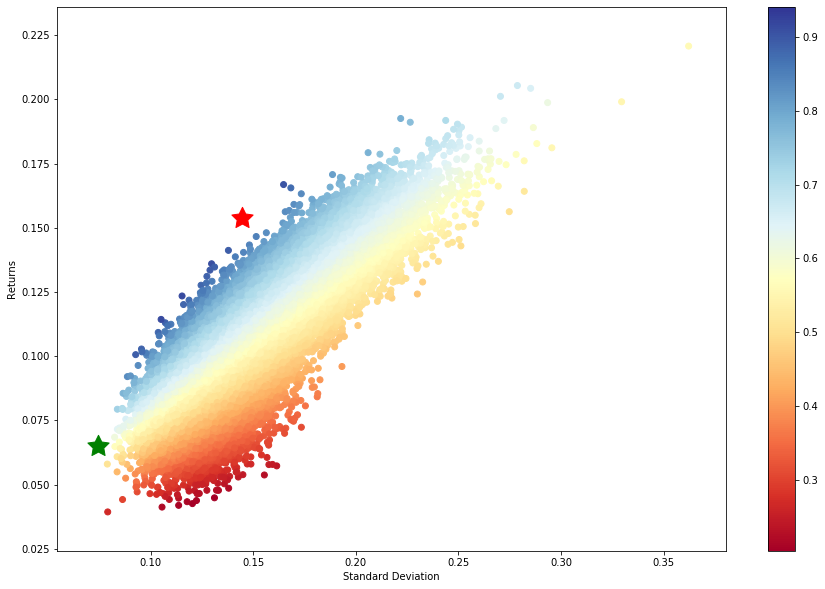

In [11]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [12]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AAPL,CAT,GS,IBM,JNJ,JPM,MCD,MSFT,VZ,WBA
18809,0.153716,0.144392,0.939916,0.043579,0.183552,0.067227,0.002247,0.033118,0.114462,0.199298,0.338317,0.00945,0.00875


In [13]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,CAT,GS,IBM,JNJ,JPM,MCD,MSFT,VZ,WBA
41949,0.06517,0.074273,0.635093,0.146086,0.000104,0.004588,0.001742,0.332361,0.006813,0.161482,0.154731,0.056391,0.135702


In [14]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var


def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [15]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018
days = 252
alpha = 0.01

results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

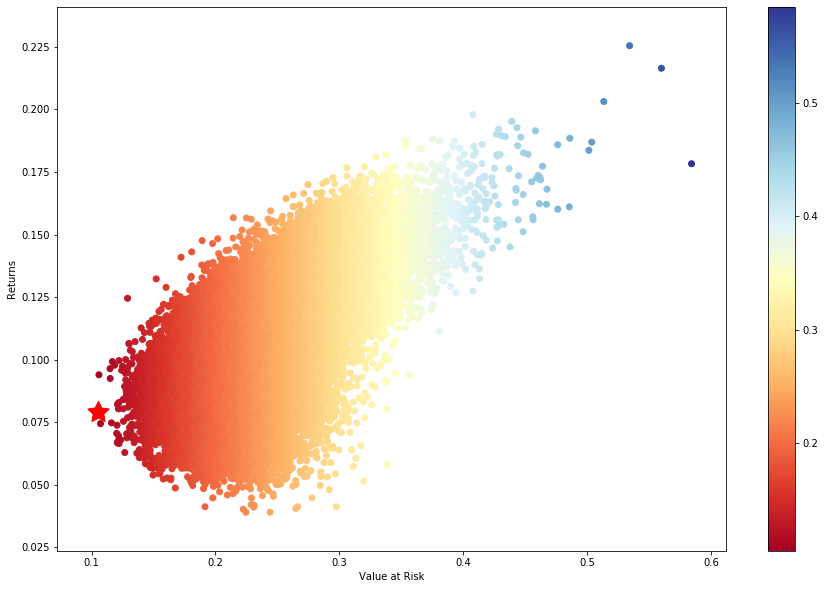

In [16]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [17]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AAPL,CAT,GS,IBM,JNJ,JPM,MCD,MSFT,VZ,WBA
29061,0.079283,0.079215,0.104999,0.154298,0.02171,0.011813,0.00834,0.149911,0.029306,0.208524,0.226232,0.02802,0.161845


In [18]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        no_assets=10
        weights = [1/ no_assets for i in range (no_assets)]
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [19]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018


results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)

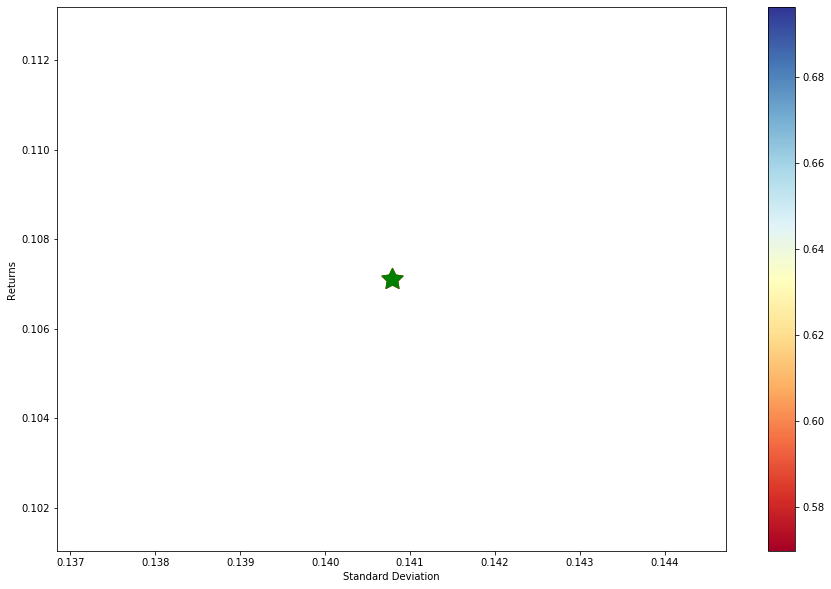

In [20]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [21]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,CAT,GS,IBM,JNJ,JPM,MCD,MSFT,VZ,WBA
0,0.107115,0.140783,0.632993,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [22]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var


def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        no_assets=10
        weights = [1/ no_assets for i in range (no_assets)]
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR',stock[0],stock[1],stock[2],stock[3],stock[4],stock[5],stock[6],stock[7],stock[8],stock[9]])
        
    return results_df

In [23]:
mean_returns = stocks.pct_change().mean()
cov = stocks.pct_change().cov()
num_portfolios = 50000
rf = 0.018
days = 252
alpha = 0.01

results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)

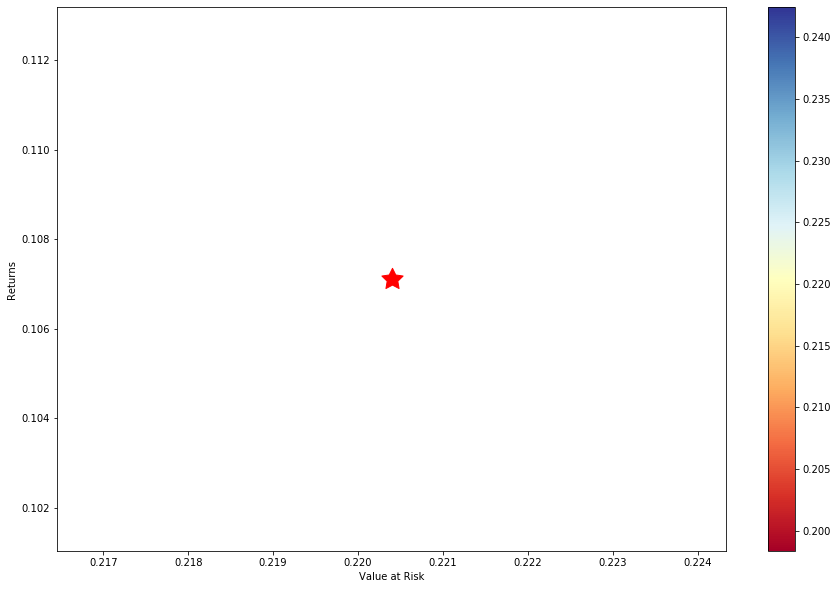

In [24]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [25]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AAPL,CAT,GS,IBM,JNJ,JPM,MCD,MSFT,VZ,WBA
0,0.107115,0.140783,0.220396,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
